# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

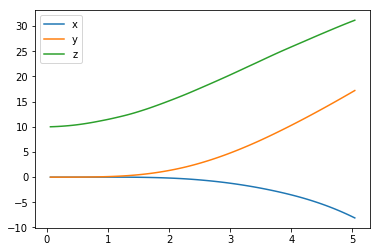

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

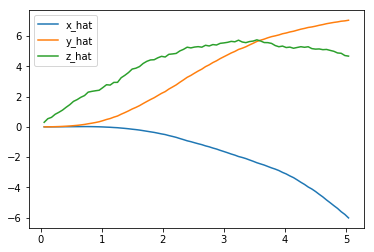

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

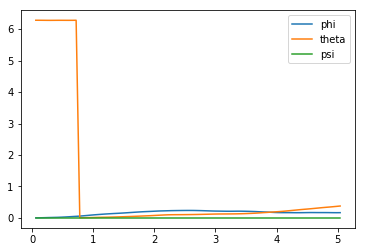

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

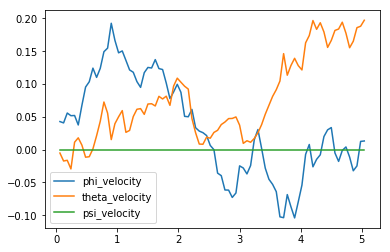

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

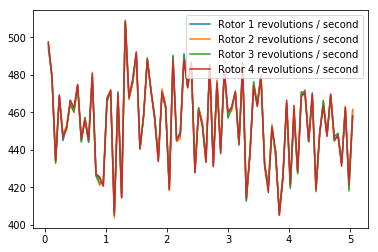

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -8.09878729  17.20938254  31.17254213   0.16689708   0.37824436   0.        ]
[-6.01137814  7.03732249  4.66872233]
[ 0.01310222  0.19715053  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [10]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.420 (best =  -0.012), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [68]:
## TODO: Train your agent here.
from agents.ddpg_agent import DDPG

num_episodes = 1000 # number of episodes
target_pos = np.array([0., 0., 10.])                          
init_pose = np.array([0., 0., 0.0, 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities

ddpg_task = Task(init_pose=init_pose, init_velocities=init_velocities,
                 init_angle_velocities=init_angle_velocities, target_pos=target_pos)

#ddpg_task = Task(target_pos=target_pos)
ddpg_agent = DDPG(ddpg_task)

rewards = []

for i_episode in range(1, num_episodes+1):
    state = ddpg_agent.reset_episode() # start a new episode

    while True:        
        action = ddpg_agent.act(state) 
        next_state, reward, done = ddpg_task.step(action)
        ddpg_agent.step(action, reward, next_state, done)
        state = next_state
        
        #print("Action = {}, \nReward= {}\t pos = {:.3f},  \taccl = {:.3f} \tang_accl = {:.3f}"
        #      .format(action, reward, ddpg_task.sim.pose[2], ddpg_task.sim.linear_accel.sum(), 
        #              ddpg_task.sim.angular_accels.sum()))
        
        if done:
            rewards.append(ddpg_agent.score)
            print("Episode = {:4d}, score = {:7.3f} (best = {:7.3f}); pos = {:.3f}, {:.3f}, {:.3f} \n\t\taccl = {:.3f} \tang_accl = {:.3f}"
                  .format(i_episode, ddpg_agent.score, ddpg_agent.best_score,
                         ddpg_task.sim.pose[0],
                         ddpg_task.sim.pose[1], 
                         ddpg_task.sim.pose[2],  
                         ddpg_task.sim.linear_accel.sum(), 
                         ddpg_task.sim.angular_accels.sum()))  # [debug]
            break
    sys.stdout.flush()

Episode =    1, score =  23.886 (best =  23.886); pos = -0.221, 0.412, 0.000 
		accl = -15.782 	ang_accl = 26.839
Episode =    2, score =  24.920 (best =  24.920); pos = 0.033, -0.025, 0.000 
		accl = -5.470 	ang_accl = 22.076
Episode =    3, score =  30.223 (best =  30.223); pos = -0.144, 0.056, 0.000 
		accl = -7.162 	ang_accl = -18.193
Episode =    4, score =  12.406 (best =  30.223); pos = -0.005, -0.000, 0.000 
		accl = 9.975 	ang_accl = 78.003
Episode =    5, score =  23.887 (best =  30.223); pos = -0.220, 0.411, 0.000 
		accl = -15.339 	ang_accl = 26.897
Episode =    6, score =  12.406 (best =  30.223); pos = -0.005, -0.000, 0.000 
		accl = 9.951 	ang_accl = 77.940
Episode =    7, score =  12.407 (best =  30.223); pos = -0.005, -0.000, 0.000 
		accl = 10.039 	ang_accl = 78.025
Episode =    8, score =  23.884 (best =  30.223); pos = -0.222, 0.413, 0.000 
		accl = -16.338 	ang_accl = 26.766
Episode =    9, score =  23.886 (best =  30.223); pos = -0.219, 0.411, 0.000 
		accl = -15.

Episode =   73, score =   6.840 (best =  55.256); pos = -0.011, -0.023, 0.000 
		accl = -22.985 	ang_accl = 144.928
Episode =   74, score =   6.857 (best =  55.256); pos = -0.011, -0.024, 0.000 
		accl = -24.608 	ang_accl = 147.342
Episode =   75, score =   6.874 (best =  55.256); pos = -0.010, -0.025, 0.000 
		accl = -24.393 	ang_accl = 149.526
Episode =   76, score =   6.893 (best =  55.256); pos = -0.010, -0.026, 0.000 
		accl = -21.755 	ang_accl = 151.665
Episode =   77, score =   6.914 (best =  55.256); pos = -0.010, -0.027, 0.000 
		accl = -16.691 	ang_accl = 153.885
Episode =   78, score =   6.935 (best =  55.256); pos = -0.009, -0.028, 0.000 
		accl = -10.378 	ang_accl = 155.888
Episode =   79, score =   6.958 (best =  55.256); pos = -0.009, -0.029, 0.000 
		accl = -3.874 	ang_accl = 157.990
Episode =   80, score =   6.980 (best =  55.256); pos = -0.008, -0.030, 0.000 
		accl = 1.356 	ang_accl = 160.035
Episode =   81, score =   7.001 (best =  55.256); pos = -0.007, -0.031, 0.0

Episode =  145, score =   6.904 (best =  55.256); pos = -0.028, -0.032, 0.000 
		accl = -21.608 	ang_accl = 144.012
Episode =  146, score =   6.906 (best =  55.256); pos = -0.028, -0.032, 0.000 
		accl = -21.123 	ang_accl = 144.100
Episode =  147, score =   6.908 (best =  55.256); pos = -0.028, -0.032, 0.000 
		accl = -20.559 	ang_accl = 144.261
Episode =  148, score =   6.911 (best =  55.256); pos = -0.028, -0.032, 0.000 
		accl = -19.835 	ang_accl = 144.615
Episode =  149, score =   6.913 (best =  55.256); pos = -0.028, -0.032, 0.000 
		accl = -19.572 	ang_accl = 144.782
Episode =  150, score =   6.917 (best =  55.256); pos = -0.029, -0.033, 0.000 
		accl = -18.915 	ang_accl = 145.229
Episode =  151, score =   6.918 (best =  55.256); pos = -0.029, -0.033, 0.000 
		accl = -19.037 	ang_accl = 145.485
Episode =  152, score =   6.922 (best =  55.256); pos = -0.030, -0.032, 0.000 
		accl = -18.711 	ang_accl = 146.039
Episode =  153, score =   6.926 (best =  55.256); pos = -0.031, -0.032, 

Episode =  216, score =   6.549 (best =  55.256); pos = -0.019, 0.015, 0.000 
		accl = -36.649 	ang_accl = 100.418
Episode =  217, score =   6.549 (best =  55.256); pos = -0.017, 0.014, 0.000 
		accl = -39.377 	ang_accl = 100.562
Episode =  218, score =   6.549 (best =  55.256); pos = -0.016, 0.013, 0.000 
		accl = -40.441 	ang_accl = 100.589
Episode =  219, score =   6.549 (best =  55.256); pos = -0.014, 0.012, 0.000 
		accl = -40.037 	ang_accl = 100.669
Episode =  220, score =   6.553 (best =  55.256); pos = -0.013, 0.011, 0.000 
		accl = -37.477 	ang_accl = 101.022
Episode =  221, score =   6.560 (best =  55.256); pos = -0.012, 0.009, 0.000 
		accl = -31.550 	ang_accl = 101.487
Episode =  222, score =   6.571 (best =  55.256); pos = -0.011, 0.007, 0.000 
		accl = -22.071 	ang_accl = 102.155
Episode =  223, score =   6.591 (best =  55.256); pos = -0.010, 0.004, 0.000 
		accl = -7.957 	ang_accl = 103.302
Episode =  224, score =   6.610 (best =  55.256); pos = -0.009, 0.003, 0.000 
		a

		accl = -1.646 	ang_accl = 116.972
Episode =  288, score =   6.779 (best =  55.256); pos = -0.000, -0.032, 0.000 
		accl = -2.337 	ang_accl = 116.809
Episode =  289, score =   6.780 (best =  55.256); pos = -0.000, -0.032, 0.000 
		accl = -1.304 	ang_accl = 116.831
Episode =  290, score =   6.778 (best =  55.256); pos = -0.000, -0.032, 0.000 
		accl = -1.859 	ang_accl = 116.681
Episode =  291, score =   6.778 (best =  55.256); pos = -0.000, -0.032, 0.000 
		accl = -1.903 	ang_accl = 116.571
Episode =  292, score =   6.777 (best =  55.256); pos = -0.000, -0.032, 0.000 
		accl = -1.871 	ang_accl = 116.468
Episode =  293, score =   6.776 (best =  55.256); pos = -0.000, -0.032, 0.000 
		accl = -2.114 	ang_accl = 116.336
Episode =  294, score =   6.773 (best =  55.256); pos = -0.000, -0.032, 0.000 
		accl = -3.387 	ang_accl = 116.107
Episode =  295, score =   6.773 (best =  55.256); pos = -0.000, -0.032, 0.000 
		accl = -3.150 	ang_accl = 116.037
Episode =  296, score =   6.772 (best =  55.

Episode =  360, score =   5.334 (best =  55.256); pos = 0.039, -0.011, 0.000 
		accl = -9.577 	ang_accl = -71.554
Episode =  361, score =   5.314 (best =  55.256); pos = 0.042, -0.011, 0.000 
		accl = -23.689 	ang_accl = -73.632
Episode =  362, score =   5.294 (best =  55.256); pos = 0.046, -0.010, 0.000 
		accl = -37.939 	ang_accl = -75.532
Episode =  363, score =   5.275 (best =  55.256); pos = 0.050, -0.010, 0.000 
		accl = -49.486 	ang_accl = -77.493
Episode =  364, score =   5.260 (best =  55.256); pos = 0.053, -0.010, 0.000 
		accl = -57.796 	ang_accl = -79.063
Episode =  365, score =   5.245 (best =  55.256); pos = 0.056, -0.010, 0.000 
		accl = -62.868 	ang_accl = -80.902
Episode =  366, score =   5.235 (best =  55.256); pos = 0.060, -0.009, 0.000 
		accl = -63.546 	ang_accl = -82.407
Episode =  367, score =   5.227 (best =  55.256); pos = 0.063, -0.009, 0.000 
		accl = -61.001 	ang_accl = -83.899
Episode =  368, score =  10.675 (best =  55.256); pos = 0.204, -0.089, 0.000 
		a

Episode =  433, score =  40.481 (best =  58.224); pos = 4.514, 0.056, 0.000 
		accl = 45.281 	ang_accl = 0.290
Episode =  434, score =  51.879 (best =  58.224); pos = 0.135, 0.002, 0.000 
		accl = -34.405 	ang_accl = -1.067
Episode =  435, score = 206.271 (best = 206.271); pos = 35.625, 12.692, 0.000 
		accl = -7.346 	ang_accl = -0.422
Episode =  436, score =  66.075 (best = 206.271); pos = -11.744, 2.022, 0.000 
		accl = 13.512 	ang_accl = 3.201
Episode =  437, score =  72.233 (best = 206.271); pos = -12.345, -0.135, 0.000 
		accl = 8.417 	ang_accl = 2.551
Episode =  438, score =  54.004 (best = 206.271); pos = -8.025, 3.227, 0.000 
		accl = 32.307 	ang_accl = 5.387
Episode =  439, score =  48.055 (best = 206.271); pos = -6.081, 2.893, 0.000 
		accl = -41.451 	ang_accl = 7.464
Episode =  440, score =  24.389 (best = 206.271); pos = -1.712, 0.497, 0.000 
		accl = 12.160 	ang_accl = 32.089
Episode =  441, score =  24.357 (best = 206.271); pos = -1.620, 0.194, 0.000 
		accl = 26.589 	ang

Episode =  505, score = 160.149 (best = 257.131); pos = -23.853, 2.601, 0.000 
		accl = 20.093 	ang_accl = 2.232
Episode =  506, score = 256.846 (best = 257.131); pos = -14.835, 11.630, 20.834 
		accl = 20.273 	ang_accl = 0.296
Episode =  507, score = 256.682 (best = 257.131); pos = -20.996, 2.299, 20.193 
		accl = 19.534 	ang_accl = 0.357
Episode =  508, score = 257.272 (best = 257.272); pos = -10.107, 16.767, 17.781 
		accl = 24.760 	ang_accl = 0.454
Episode =  509, score = 256.567 (best = 257.272); pos = -31.902, -10.198, 20.590 
		accl = 27.084 	ang_accl = 0.644
Episode =  510, score = 256.188 (best = 257.272); pos = -18.366, 0.127, 19.770 
		accl = 19.347 	ang_accl = 0.367
Episode =  511, score = 256.490 (best = 257.272); pos = -30.515, -21.061, 20.364 
		accl = 30.726 	ang_accl = 0.182
Episode =  512, score = 257.275 (best = 257.275); pos = -14.496, 11.634, 21.003 
		accl = 24.230 	ang_accl = 0.599
Episode =  513, score = 256.231 (best = 257.275); pos = -36.440, -19.370, 18.945 


Episode =  577, score = 257.200 (best = 258.110); pos = -14.011, 21.115, 17.972 
		accl = 11.255 	ang_accl = 0.322
Episode =  578, score = 256.749 (best = 258.110); pos = -8.915, 11.515, 17.718 
		accl = 8.843 	ang_accl = 0.685
Episode =  579, score = 257.530 (best = 258.110); pos = -10.548, 20.084, 17.356 
		accl = 25.935 	ang_accl = -0.102
Episode =  580, score = 256.344 (best = 258.110); pos = -19.243, -6.174, 21.449 
		accl = 20.427 	ang_accl = 0.301
Episode =  581, score = 256.698 (best = 258.110); pos = -31.186, -9.841, 21.735 
		accl = 26.442 	ang_accl = 0.387
Episode =  582, score = 244.173 (best = 258.110); pos = -92.543, -61.008, 0.000 
		accl = -777.820 	ang_accl = 0.301
Episode =  583, score = 256.458 (best = 258.110); pos = -38.021, -24.446, 19.364 
		accl = 29.764 	ang_accl = 0.573
Episode =  584, score = 256.602 (best = 258.110); pos = -20.114, 3.604, 20.975 
		accl = 23.571 	ang_accl = 0.132
Episode =  585, score = 256.609 (best = 258.110); pos = -26.816, -6.784, 21.061

Episode =  649, score = 255.868 (best = 258.110); pos = -42.442, -23.820, 17.996 
		accl = 28.285 	ang_accl = 0.256
Episode =  650, score = 256.561 (best = 258.110); pos = -21.386, 2.741, 21.668 
		accl = 21.765 	ang_accl = 0.297
Episode =  651, score = 256.687 (best = 258.110); pos = -36.479, -23.611, 20.300 
		accl = 31.426 	ang_accl = 0.139
Episode =  652, score = 257.222 (best = 258.110); pos = -13.036, 13.040, 20.222 
		accl = 24.926 	ang_accl = 0.219
Episode =  653, score = 256.340 (best = 258.110); pos = -42.571, -22.663, 19.056 
		accl = 31.695 	ang_accl = 0.600
Episode =  654, score = 256.180 (best = 258.110); pos = -35.432, -29.739, 17.702 
		accl = 28.673 	ang_accl = -0.057
Episode =  655, score = 256.965 (best = 258.110); pos = -7.684, 12.553, 18.889 
		accl = 15.188 	ang_accl = -0.068
Episode =  656, score = 258.025 (best = 258.110); pos = -11.366, 29.895, 15.234 
		accl = 18.383 	ang_accl = 0.261
Episode =  657, score = 256.405 (best = 258.110); pos = -36.726, -29.979, 18

Episode =  721, score = 256.447 (best = 258.110); pos = -34.730, -17.912, 19.968 
		accl = 30.590 	ang_accl = 0.324
Episode =  722, score = 256.497 (best = 258.110); pos = -34.033, -19.372, 19.856 
		accl = 29.909 	ang_accl = 0.260
Episode =  723, score = 256.422 (best = 258.110); pos = -20.788, -2.699, 20.174 
		accl = 15.320 	ang_accl = 0.262
Episode =  724, score = 257.831 (best = 258.110); pos = -12.010, 21.329, 18.767 
		accl = 24.496 	ang_accl = 0.453
Episode =  725, score = 257.356 (best = 258.110); pos = -12.849, 20.521, 17.350 
		accl = 20.500 	ang_accl = 0.182
Episode =  726, score = 256.326 (best = 258.110); pos = -27.623, -8.997, 20.496 
		accl = 21.316 	ang_accl = 0.384
Episode =  727, score = 257.012 (best = 258.110); pos = -17.136, 7.253, 19.746 
		accl = 19.464 	ang_accl = 0.348
Episode =  728, score = 257.357 (best = 258.110); pos = -17.428, 11.578, 19.640 
		accl = 23.159 	ang_accl = 0.597
Episode =  729, score = 257.201 (best = 258.110); pos = -14.435, 11.141, 20.407

Episode =  793, score = 256.840 (best = 258.110); pos = -30.893, -2.252, 19.905 
		accl = 22.699 	ang_accl = 0.479
Episode =  794, score = 256.364 (best = 258.110); pos = -35.440, -23.518, 19.380 
		accl = 30.317 	ang_accl = 0.329
Episode =  795, score = 256.381 (best = 258.110); pos = -21.339, -7.395, 21.139 
		accl = 18.609 	ang_accl = 0.101
Episode =  796, score = 256.597 (best = 258.110); pos = -27.090, -22.176, 20.862 
		accl = 28.196 	ang_accl = 0.365
Episode =  797, score = 256.996 (best = 258.110); pos = -25.522, 0.896, 21.320 
		accl = 24.316 	ang_accl = 0.330
Episode =  798, score = 257.556 (best = 258.110); pos = -7.455, 31.439, 12.279 
		accl = 23.266 	ang_accl = 0.797
Episode =  799, score = 258.085 (best = 258.110); pos = -19.138, 21.574, 18.941 
		accl = 21.117 	ang_accl = 0.512
Episode =  800, score = 257.431 (best = 258.110); pos = -14.474, 14.378, 19.471 
		accl = 24.806 	ang_accl = 0.238
Episode =  801, score = 257.373 (best = 258.110); pos = -5.013, 23.514, 16.592 


Episode =  865, score = 256.537 (best = 258.127); pos = -26.703, -6.815, 22.241 
		accl = 19.884 	ang_accl = 0.324
Episode =  866, score = 256.590 (best = 258.127); pos = -33.469, -23.306, 20.580 
		accl = 31.355 	ang_accl = 0.316
Episode =  867, score = 256.932 (best = 258.127); pos = -19.993, 4.419, 19.339 
		accl = 14.614 	ang_accl = 0.143
Episode =  868, score = 257.669 (best = 258.127); pos = -12.407, 21.488, 17.303 
		accl = 24.685 	ang_accl = 0.497
Episode =  869, score = 257.214 (best = 258.127); pos = -17.148, 10.111, 20.345 
		accl = 23.412 	ang_accl = 0.782
Episode =  870, score = 256.849 (best = 258.127); pos = -7.164, 13.127, 18.921 
		accl = 27.720 	ang_accl = 0.334
Episode =  871, score = 256.858 (best = 258.127); pos = -29.794, -4.514, 21.584 
		accl = 26.608 	ang_accl = 0.283
Episode =  872, score = 256.610 (best = 258.127); pos = -15.570, 9.105, 19.615 
		accl = 22.685 	ang_accl = 0.148
Episode =  873, score = 256.557 (best = 258.127); pos = -22.054, -2.083, 21.606 
	

Episode =  937, score = 254.500 (best = 258.127); pos = -48.236, -28.681, 14.127 
		accl = -23.268 	ang_accl = 0.358
Episode =  938, score = 256.626 (best = 258.127); pos = -33.299, -13.749, 20.284 
		accl = 27.233 	ang_accl = 0.380
Episode =  939, score = 256.317 (best = 258.127); pos = -41.638, -21.470, 19.372 
		accl = 31.642 	ang_accl = 0.202
Episode =  940, score = 255.492 (best = 258.127); pos = -0.148, 32.615, 11.500 
		accl = -1.641 	ang_accl = -235.432
Episode =  941, score = 256.822 (best = 258.127); pos = -23.026, 3.236, 20.601 
		accl = 22.507 	ang_accl = 0.345
Episode =  942, score = 256.258 (best = 258.127); pos = -16.348, -9.504, 21.601 
		accl = 20.276 	ang_accl = 0.010
Episode =  943, score = 257.481 (best = 258.127); pos = -7.764, 29.631, 13.497 
		accl = 21.662 	ang_accl = 0.271
Episode =  944, score = 256.459 (best = 258.127); pos = -22.628, -3.735, 21.207 
		accl = 24.311 	ang_accl = 0.131
Episode =  945, score = 257.672 (best = 258.127); pos = -12.898, 24.727, 16.

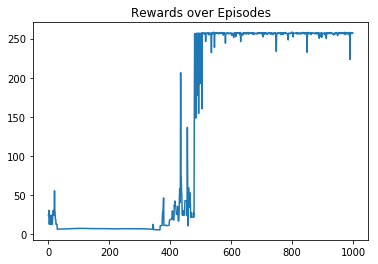

In [69]:
plt.title('Rewards over Episodes')
plt.plot(rewards, label='rewards');

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
The task defined for the agent was to take off to a height 'z' of 10 units with little consideration given to the final x and y positions at the expected height (z). 

Considered punishment and conditional reward. The agent was punished for whirling around and distance nearing the desired targed height. Additionally, the agent received a reward for its linear acceleration which guarantees a continous (vertical) movement towards desired position. Hence, the reward function was the total of the aforementioned plus 1 (which is a constant reward). 



**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

- Tried the Deep Deterministic Policy Gradient (DDPG) algorithm, which was tweaked over many iterations to yield the current outcome.


- For the DDPG-based agent, the following were used:
    - Discount factor (gamma): 0.99
    - Target update param (tau): 0.01
    - OUNoise( mu: 0, theta:0.15, sigma:0.2)
    - action repeat: 3
    - action_low: 0
    - action_high: 900
    
    
- The ANN for the actor and critic model is as follows:
    - For the Actor, an input layer having the state size. Three (3) hidden (fully-connected) layers having sizes 32, 64 and 32 respectively. The hidden layers were also had Rectified Linear Unit (ReLU) activation functions. The final output layer has the size of the action_size (i.e. produces four outputs). Sigmoid function was applied to these outputs to re-scale values between 0 and 1. 
    - Notably, the Critic has to separately defined state and action pathways (with input layers defined as states and action sizes respectively), both with identical two-hidden layes of sizes 32 and 64 using ReLU activation. Then both pathways are then unified to produce q-values at the final layer.
    

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
  - It was not a straightforward task to learn.
  - It was a fluctuating learning curve with occasional periods of progress followed by plumment in estimated values. 
  - The behavior of the agent was somewhat satisfactory even though it stayed at an estimate z postion of 14 (+/- 6) for 600 episodes. It showed that for most  non-negative (combined, i.e., sum of linear and angular) accelerations, the agent's corresponding z position within the specified confidence interval. And for 'most' individual linear and angular acceleration computation  having negative values (depicting deceleration), the agent had x values close to zero (i.e., not in flight). This is what was stipulated by the reward function design because continous linear and angular acceleration/deceleration should take the agent from its starting positions and almost occassionally return to its initial position (x,y) when in flight while maintaining acceleration as against deceleration. This is due to the fact the reward function could not make the agent stay in one position (for x and y) and at the same time ascend vertically towards z, so it was imperative to the design that we control it's movement in relation to its starting position without estimating values driven by the agent's acceleration. 
      - Notably, the quadcopter seems to be in flight when:
          - combined linear and angular accelerations are not having  lower (i.e. < -60) negative values.
          - linear acceleration is positive (i.e.,  if this value is negative the probability that the quadcopter is in flight is close to zero).
          - positions x and y  'do not' have near zero (0) values.
      - Since we considered the 'absolute' sum of x and y for punishment  and 'normal' sum of linear & angular acceleration for gains when calculating rewards, the agent could not explicitly control those values, which is the only possible explanation for the behavior.
       
      - For verification, in most episodes where the linear and angular accelerations were positive (i.e., acceleration is taking place), the agent was  in flight (even if not 'precisely' at the desired height). This means the reward function needs a more sophisticated and holistic approach in order to precisely attain the desired height or reduce the +/- values to 1 or 2.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved? 

**Answer**:
  - The most challenging parts were: completely grasping how to specify a desired task and designing the reward function to learn the task. I considered different parameters such as linear and angular velocities,  and thrust computation to see how to give reward for elevation and also considered punishment to detracting actions (i.e., whirling around while flying) and the difference in estimated and target heights.
      - Also, the fact that each iteration produces a different outcome can be challenging. It would be nice to have an adequate technique to make these outcomes reproducible (if possible).
      - Furthermore, in all attempts to learn this task, the constant values attached to both the reward_gained and punishment (deductions) were continously tweaked in factors/divisions of 10s thereby scaling up or down individual contributions to the final reward (with no guarantee).
      
      
  - Yes. The fact that it did its exploration for appr. 500 episodes before estimating values of z significantly higher than that of the initial position (although this may not be the case in another iteration setup). Nevertheless, one could not explain precisely what was responsible for this behavior, which makes it something interesting to figure out. 
    